<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [29]:
hh_database = pd.read_csv(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\Data\hh_database.csv', sep=';')
hh_database.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [30]:
hh_database.head(2)
hh_database.tail(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [31]:
hh_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [32]:
hh_database.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [33]:
# Создаём функцию, которая будет определять уровень образования и преобразовывать его в одну из 4 категорий
# "высшее", "неоконченное высшее", "среднее специальное" и "среднее"
def get_education (arg):
    """Функция определяет уровень  образования по ключевым словам из строк текущего признака 'Образование и Вуз' 

    Args:
        arg (string): Строка, содержащая информаю об уровне образования. 

    Returns:
        (string ): Функция возвращает одно из четырех строковых значений, \
                    соответствующее категориям уровня образования: Высшее,\
                    Неоконченное высшее, среднее и среднее специальное 
    """
    if arg.split(' ')[0] == 'Высшее':
        return 'высшее'
    elif arg.split(' ')[:2] == ['Неоконченное', 'высшее']:
        return 'неоконченное высшее'
    elif arg.split(' ')[:2] == ['Среднее', 'специальное']:
        return 'среднее специальное'
    else:
        return 'среднее'


# Образуем новый признак "Образование" и удаляем текущий признак - "Образование и ВУЗ"
hh_database['Образование'] = hh_database['Образование и ВУЗ'].apply(get_education)
hh_database = hh_database.drop(['Образование и ВУЗ'], axis=1)


# Проверяем новый признак на число уникальных категорий
display(hh_database['Образование'].nunique())
display(hh_database[hh_database['Образование'] == 'среднее'].shape[0])

4

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [34]:
# Создаём новые признаки "Пол" и "Возраст" через лямбда функцию
hh_database['Пол'] = hh_database['Пол, возраст'].apply(lambda x: 'M' if x.split(' , ')[0] == 'Мужчина'  else 'Ж')
hh_database['Возраст'] = hh_database['Пол, возраст'].apply(lambda x :  int(x.split(' , ')[1].split()[0]))


# Проверяем на число уникальных значений признак "Пол"
display(hh_database['Пол'].unique())


# Удаляем текущий признак
hh_database = hh_database.drop(['Пол, возраст'], axis=1)


# Отвечаем на контрольные вопросы:
# Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
# Чему равен средний возраст соискателей? Ответ округлите до десятых.
display(((hh_database['Пол'].value_counts(normalize=True)*100).round(2)), (hh_database['Возраст'].describe().round(1)))

array(['M', 'Ж'], dtype=object)

Пол
M    80.93
Ж    19.07
Name: proportion, dtype: float64

count    44744.0
mean        32.2
std          7.9
min         14.0
25%         27.0
50%         31.0
75%         36.0
max        100.0
Name: Возраст, dtype: float64

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [35]:
def get_months_of_experience(string):
    """Функция вычисляет общий опыт работы в месяцах из столбца "Опыт работы"
    
    Arguments:
            (string) На вход функция принимает строку из столбца
                "Опыт работы" и выделяет из него годы и месяца и переводит их в месяца.
    
    Returns:
            (integer) На выходе функция возвращает целое число, отображающее общий опыт работы в месяцах
    """
    # Инициируем списки используемых измерений времени (годы и месяца) во всех возможных склонениях 
    years_list = ['лет', 'год', 'года']
    month_list = ['месяцев', 'месяц', 'месяца']
    years = 0
    months = 0
    # если приобработке столбца встречаем ропуски и скрытые пропуски со значениями  "Не указано" оставляем как пропуски
    if pd.isna(string) or string == 'Не указано':
        experience = pd.NA
    else:
        # Иначе обрабатываем строку, делим строку сначала на 7 частей по пробелам, где седьмая часть не несет для нас никакой информации, её отсекаем.
        str_list = string.split(maxsplit=7)[:6]
        # В цикле пробегаемся по списку слов строки
        for word in str_list:
            # определяем индекс чисел отображающих годы и месяца в строке
            if word in years_list:
                years = int(str_list[(str_list.index(word)-1)])
            if word in month_list:
                months = int(str_list[(str_list.index(word)-1)])
        experience = float(years*12 + months)
    return experience
# Создаём новый признак и удаляем текущий
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы'].apply(get_months_of_experience)
hh_database = hh_database.drop('Опыт работы', axis=1)


# Отвечаем на контрольный вопрос: Чему равен медианный опыт работы (в месяцах)?
print(f'Медианный опыт работы: {hh_database["Опыт работы (месяц)"].median()} месяцев')

Медианный опыт работы: 100.0 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [36]:
def get_city(x):
    """Функция определяет город проживания соискателя и категоризирует полученное значение на 4 категории:
                'Москва', 'Санкт-Петербург', 'город-миллионник', 'другие'
        Args:
                (string) На вход функция принимает строку из столбца "Город, переезд, командировки" 
        Returns:
                (string) Функция возвращает один из 4-х городов
    """
    # Задаём список горов миллионника
    million_cities = ['Новосибирск', 'Екатеринбург', \
                    'Нижний Новгород', 'Казань', 'Челябинск', \
                    'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', \
                    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' 
                    ]
    # Выделяем первый (с индексом 0) элемент списка из строки,в котором содержится название города
    list_f = x.split(' , ')[0]
    # проверяем условия категоризации городов и выводим соответствующую категорию
    if list_f == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif list_f == 'Москва':
        return 'Москва'
    elif list_f in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
    
# Функция для образования признака готовности к переездам
def get_moving(x):
    """Функция определяет готовность соискателя к переездам  по ключевым словам

    Args:
        x (string): На вход функция принимает строку из столбца "город, переезд, камандировки" и проверяет есть ли ключевое слово "не" 

    Returns:
        (boool): На выходе Функция возвращает булево значение: True или False
    """
    # Определяем местоположение фразы о переезде в каждой строке признака "Город, переезд, командировки",
    list_f = x.split(' , ')
    # данная фраза должна содержать либо ключевое слово  "переезду", либо - "переехать", 
    # если одно из этих слов есть во фразе используем его индекс
    str_1, str_2 = 'переезду', 'переехать'
    moving = list_f[1]
    # Если во второй части (1- элемент списка) строки нет  хотя бы одного из ключевых слов, 
    # значит целевая частьь строки следующая  (2-элемент списка) 
    if (str_1 not in moving) and (str_2 not in moving):
        moving = list_f[2]
    # Если фраза содержит частицу "не",то соискатель не готов к переездам, в ином случае готов
    if 'не' in moving:
        return False
    else:
        return True
    
    
# Функция для образования признака готовности к коммандировкам
def business_trips(x):
    """Функция определяет готовность соискателя к командировкам  по ключевым словам

    Args:
        x (string): На вход функция принимает строку из столбца "город, переезд, командировки" 
                    и проверяет есть ли ключевое слово "не" 

    Returns:
        (bool): Функция возвращает булево значение True или False    
    """
    # В каждой строке существующего признака фраза о коммандировке находится в конце строки, если она вовсе не утеряна.
    list_f = x.split(' , ')
    # Если такая фраза есть в строке, она должна содержать как минимум слово "командировкам".
    if  'командировкам' in list_f[-1]:
        # и она содержит частицу "Не", значит соискатель не готов к командировкам, иначе готов
        if 'не' in list_f[-1]:
            return False
        else:
            return True
    # Иначе информация утеряна, и условно считаем таких соискателей не готовыми к командировкам
    else:
        return False
    
    
# Создаём новые признаки и удаляем текущий столбец
hh_database['Город'] = hh_database['Город, переезд, командировки'].apply(get_city)  
hh_database['Готовность к переезду'] = hh_database['Город, переезд, командировки'].apply(get_moving)
hh_database['Готовность к командировкам'] = hh_database['Город, переезд, командировки'].apply(business_trips)
hh_database = hh_database.drop('Город, переезд, командировки', axis=1)


# Контрольные вопросы:
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
print(round(hh_database['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100), 0)
print(round((hh_database[hh_database['Готовность к переезду'] & hh_database['Готовность к командировкам']].shape[0]/hh_database.shape[0]) *100, 0))    

11 0
32.0


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [37]:
# Создаём список стобцов - признаков мигалок
employments = ['полная занятость', 'частичная занятость',
            'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
        'гибкий график', 'удаленная работа',
        'вахтовый метод']


# Создаём признаки мигалки через цикл и лямбда функций
for employment, chart in zip(employments, charts):
    hh_database[employment] = hh_database['Занятость'].apply(lambda x: employment in x)
    hh_database[chart] = hh_database['График'].apply(lambda x: chart in x)
    
    
# Удаляем текущие столбцы
hh_database = hh_database.drop('Занятость', axis=1)
hh_database = hh_database.drop('График', axis=1)


# Контрольные вопросы:
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(hh_database[hh_database['проектная работа'] & hh_database['волонтерство']].shape[0])
print(hh_database[hh_database['вахтовый метод'] & hh_database['гибкий график']].shape[0])

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [38]:
# Считываем файл с курсами валют - ExchangeRates
cur_rate = pd.read_csv(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\Data\ExchangeRates.csv', sep=',')


# Переводим дату в формат DateTime и избавляемся от времени
cur_rate['date'] = pd.to_datetime(cur_rate['date'], dayfirst=True, format='%d/%m/%y')


# В признаке 'Обновление резюме' отсекаем время и меняем его формат на DateTime
hh_database['Обновление резюме'] = hh_database['Обновление резюме'].apply(lambda x: x.split()[0])
hh_database['Обновление резюме'] = pd.to_datetime(hh_database['Обновление резюме'], dayfirst=True)


# Выделяем сумму зар.платы и валюту из столбца "ЗП"
hh_database['сумма'] = hh_database['ЗП'].apply(lambda x: float(x.split()[0]))
hh_database['валюта'] = hh_database['ЗП'].apply(lambda x: x.split()[1])


# Создаём признак с валютами по стандарту ISO соответствующим валютам в данных HH резюиме
# Для этого воспользуемся методом pandas.DataFrame.merge(), 
# для которого в свою очередь нужно создать второй dataframe, 
# у которого один столбец будет идентичен со столбцом 'currency' (ключевой стобец), через которого будем осуществлять слияние.
df2 = pd.DataFrame({'валюта' : ['руб.', 'грн.', 'USD', 'EUR', 'бел.руб.', 'KGS', 'сум', 'AZN', 'KZT'],
                    'валюта по ISO': ['руб.', 'UAH', 'USD', 'EUR', 'BYN', 'KGS', 'UZS', 'AZN', 'KZT']})
hh_database = pd.merge(hh_database, df2, on='валюта', how='left')


# Избавляемся от ранее созданного столбца с валютами, выделенного от исходного столбца "ЗП"
hh_database = hh_database.drop('валюта', axis=1)


# Объединяем таблицу с резюме из HH и таблицу с курсами валют и 
# Значение close и proprtion для рубля заполняем единицей 1 (курс рубля самого к себе).
hh_database = hh_database.merge(cur_rate, how='left', left_on=['Обновление резюме', 'валюта по ISO'], right_on=['date', 'currency']) 
hh_database.loc[hh_database['валюта по ISO']=='руб.', 'close'] = 1.0
hh_database.loc[hh_database['валюта по ISO']=='руб.', 'proportion'] = 1.0


# Создаём признак зарплаты в рублях
hh_database['ЗП (руб)'] = (hh_database['сумма']*( hh_database['close'])) / hh_database['proportion']

# Удаляем все лишние столбцы
hh_database = hh_database.drop(['сумма','currency', 'per', 'date', 'time', 'close', 'vol', 'proportion', 'валюта по ISO', 'ЗП'], axis=1)


# Контрольные вопросы:
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
# Ответ приведите в тысячах рублей и округлите до целого. 
display(f'Желаемая медианная зароботная плата соискателей составляет: {(hh_database["ЗП (руб)"].median()/1000).round()} рублей')

'Желаемая медианная зароботная плата соискателей составляет: 59.0 рублей'

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

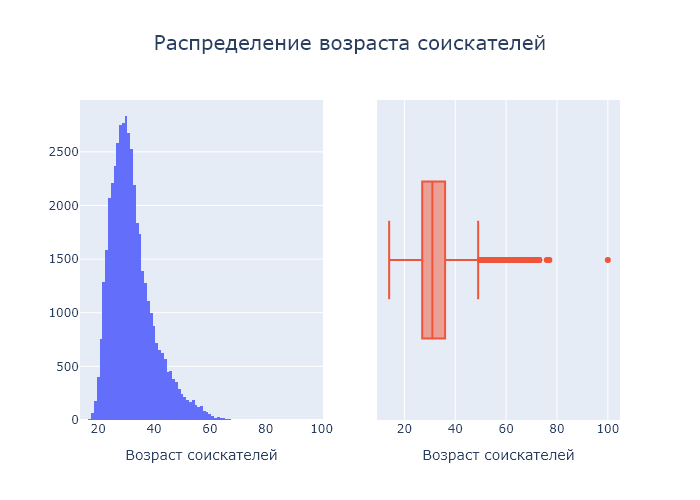

In [39]:
# Создадим фигуру с двумя плоскостями
fig = make_subplots(rows=1, cols=2, column_widths=[20, 20])

# Строим гистограмму
fig.add_histogram(
    x=hh_database['Возраст'],
    name='',
    row=1, col=1,
)

# строим коробчатую диаграмму
fig.add_box(
    x=hh_database['Возраст'],
    name='',
    row=1, col=2
)


fig.update_traces(showlegend = False) # удаляем легенду
fig.update_layout(title_text = 'Распределение возраста соискателей', title_font_size = 20, title_x = 0.5) # именуем диаграмму
fig.update_xaxes(title_text = 'Возраст соискателей', title_font_size = 14)# подписываем ось


# Записываем диаграмму в HTML
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart1.html')
fig.show("png")

1. Модальное значение распределения равно 30. 
2. Предельные значения признака равны 14 и 100, возраст большинства соискателей  находится в диапазоне от 18  до 49.
3. Аномальнвм значением можно назвать возраст 100 лет, так как сохранить трудоспособность в таком возрасте можно отнести к отклонению от нормы. 
   
Межквартильный размах распределения составляет диапазон от 27 до 36. Также наблюдается выбросы образующие правосторонюю ассеметрию, это соискатели, чей возраст выбивается от большинства, однако является вполне допустимым возрастом.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

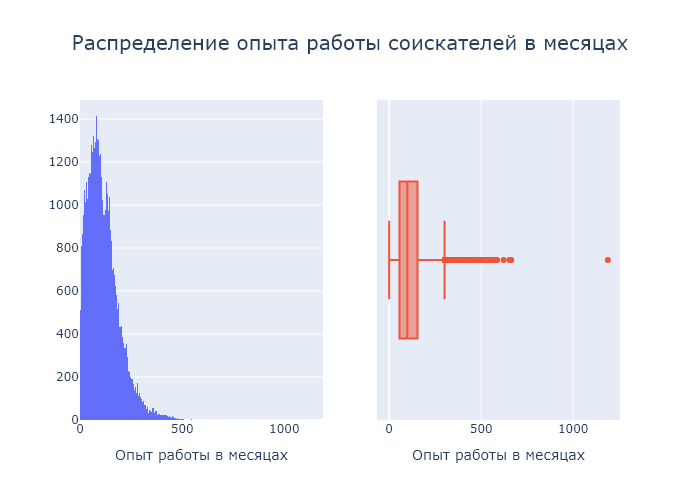

In [40]:
# Так как признак Опыт работы (месяц) содержит значения NAN заменим нулём, 
# условно договорившись о том, что если соискатель не указал опыт работы, значиит у него его нет.
hh_data_exp = hh_database.fillna(value={'Опыт работы (месяц)': 0}, )


# Далее строим гистограмму и коробчатую диаграмму
fig = make_subplots(rows=1, cols= 2)
fig.add_histogram(
    x=hh_data_exp['Опыт работы (месяц)'],
    name='',
    row=1, col=1    
)

fig.add_box(
    x=hh_data_exp['Опыт работы (месяц)'],
    name='',
    row=1, col=2
)

# Даём общее название для диаграмм, именуем ось X и удаляем легенду, так как на каждом полотне у нас по одной диаграмме.
fig.update_layout(title_text = 'Распределение опыта работы соискателей в месяцах', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(title_text = 'Опыт работы в месяцах', title_font_size = 14)
fig.update_traces(showlegend = False)

# Записываем диаграмму в HTML
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart2.html')
fig.show("png")

1. Модальный опыт работы соискателей от 80 до 84 месяцев.
2. Предельные значения опыта работы - 1 месяц и 1188 месяцев, опыт работы большинства соискателей находится в интервале от 0 до 300 месяцев. 
3. Аномалием для признака является 1188 месяцев, так как в годах этот период составляет 99 лет (возможно это тот же соискатель, указавший свой возраст как 100 лет). Значения 663, 653 и 586 нельзя отнести к аномалиям так как вероятность того что соискатель проработал 48 - 54 года ненулевая, к тому же, на таком же расстоянии в распределении возраста расположен возраст соискателей 77, 76 и 73 лет, что при вычислении возраста на начальном этепе стажа получается возраст от 21 до 24 лет, что вполне свойственно для среднестатистического человека. 
   
Межквартильный размах распределения опыта работы составил диапазон от 57 до 154 месяцев. 

Медианное значение опыта работы 99 месяцев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


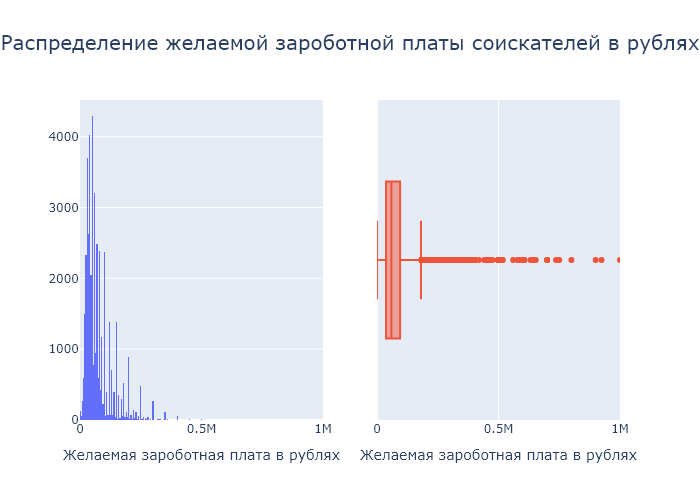

In [41]:
# Строим гистограмму и коробчатую диаграмму
fig = make_subplots(rows = 1, cols = 2, column_widths=[1, 1])

fig.add_histogram(
    x=hh_database['ЗП (руб)'],
    name='',
    row=1, col=1
)

fig.add_box(
    x=hh_database['ЗП (руб)'],
    name='',
    row=1, col=2
)
# Удалаем отображение легенды, именуем график и ось X
fig.update_traces(showlegend = False) 
fig.update_layout(title_text = 'Распределение желаемой зароботной платы соискателей в рублях', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(title_text = 'Желаемая зароботная плата в рублях', title_font_size = 14, range = [0, 1e6])


# Записываем диаграмму в HTML и отображаем её
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart3.html')
fig.show("png")


1. Модальное значение заработной платы 50 000 рублей.
2. Предельные значения распределения от 1 тысяча рублей до 24, 30488 Миллионов рублей. Зароботная плата большинства соискателей лежит в интервале от 2,5 тыс. до 150 тыс. рублей.
3. Лично по моему субъктивному мнению зароботные платы  7,7 миллионов и 24,3 миллионов рублей это ошибочно указанные данные, по моему в странах СНГ нет работодателей, которые могли бы предлагать зароботные платы в таких масштабах.
Минимальные значения от 1 тыс до 5 тыс. также сомнительны для месячной зароботной платы, даже учитыва графики с неполным рабочим днем, так как даже прожиточный минимум в России к 2018 -2019 годах составлял 10 - 12 тыс. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

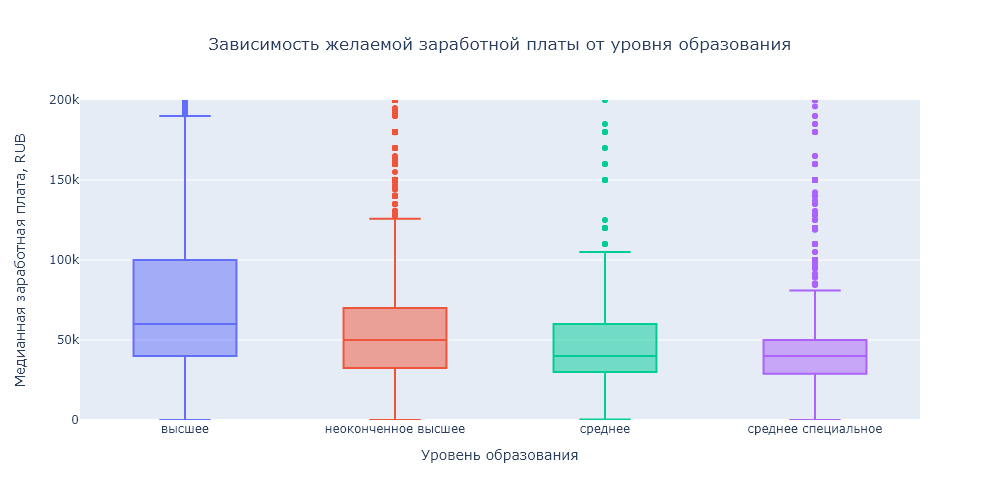

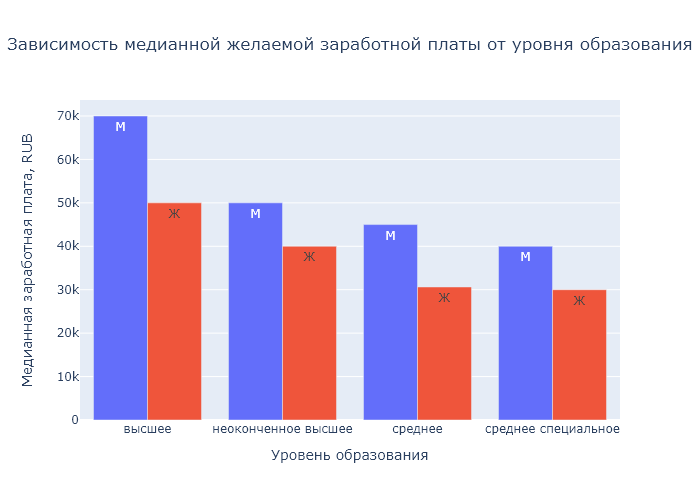

In [42]:
# Построим коробчатую и столбчатую диаграмму для анализа признака зароботной платы в разрезе уровня образования.
fig_box = px.box(
    # Фильтруем таблицу по зар.плате ниже 1 млн.
    data_frame=hh_database[hh_database['ЗП (руб)']<1e6],
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    # устанавливаем порядок отображения графиков по уровню образования 
    category_orders={'Образование':['высшее', 'неоконченное высшее', 'среднее', 'среднее специальное']},
    # устанавливаем ограничение на ось y, так как иначе боксы отображаются сплюснутыми
    range_y=[0, 200e3],
    height=500, 
    width=1000, 
    title='Зависимость желаемой заработной платы от уровня образования', #заголовок
    labels={'Образование':'Уровень образования', 'ЗП (руб)':'Медианная заработная плата, RUB'} # Подписи осей графика
)
fig_box.update_layout(title_xanchor = 'center', title_x = 0.5)
fig_box.update_traces(showlegend = False)

# Записываем диаграмму в HTML и отображаем её
fig_box.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart4.html')
fig_box.show("png")


# Коробчатая диаграмма
fig = px.bar(
    data_frame=hh_database[hh_database['ЗП (руб)'] < 1e6].groupby(by=['Образование', 'Пол'], as_index=False)['ЗП (руб)'].median(), 
    x='Образование', 
    y='ЗП (руб)', 
    barmode='group',
    color='Пол',
    text='Пол',
    labels={'Образование':'Уровень образования', 'ЗП (руб)':'Медианная заработная плата, RUB'},
    title='Зависимость медианной желаемой заработной платы от уровня образования')
fig.update_traces(showlegend = False)
fig.update_layout(title_xanchor = 'center', title_x = 0.5)

# Записываем диаграмму в HTML и отображаем её
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart5.html')
fig.show("png")


1. Наибольший уровень желаемой зароботной платы наблюдается для высшего образования, при этом наибольший разброс также наблюдается у соискателей с высшим образованием, что объясняется тем, что у людей с высшим образованием велика вариативность востребованных и дифицитных навыков. Наименьший уровень желаемой зароботной платы , также самый маленький разброс наблюдаются для среднеспециального образования.
   
2. Уровень образования несомненно является важным признаком при прогнозировании уровня зароботный платы.

Можно отметить, что соискатели женсокго пола желаемую зароботную плату указывают ниже относительно мужского пола, возможно это связано нежеланием работодателя брать на работу женщин из-за повышенных социальных обязательств связанных с декретными отпусками.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

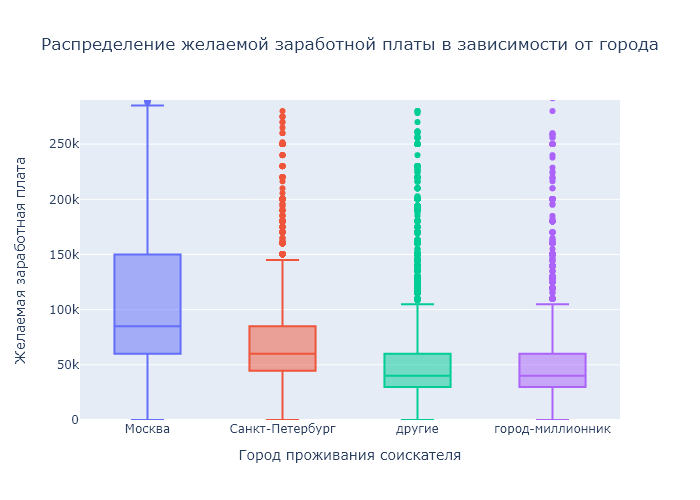

In [43]:
# Для зависимости между категориальным (дискретным) и неограниченным признаками построим коробчатую диаграмму
hh_df = hh_database[hh_database['ЗП (руб)']<1e6]
fig=px.box(
    data_frame=hh_df,
    x='Город',
    y='ЗП (руб)',
    color='Город',# цветовая категоризация, хотя в данном случае она не обязательна
    range_y=[0, 290e3],
    category_orders={'Город': ['Москва', 'Санкт-Петербург', 'другие',  'город-миллионник']},
    title ='Распределение желаемой заработной платы в зависимости от города',
    labels={'ЗП (руб)': 'Желаемая заработная плата', 'Город': 'Город проживания соискателя'}
)
fig.update_traces(showlegend=False)
fig.update_layout(title_xanchor='center', title_x=0.5)

# Записываем диаграмму в HTML и отображаем её
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart6.html')
fig.show("png")

1. Наиболее высокий медианный уровень зароботный платы наблюдается у соискателей из Москвы, следующим по медианному уровню зар.платы стоиит город Санкт-Петербург, а города из категории "другие" и "город - миллионник" по медианному уровню зар.платы на одном уровне. Также распределена ширина размаха уровня зароботный платы соответственно: самый широкий у соискателей Москвы, затем Санкт-Петербурга и самые маленькие у соискателей остальных городов.
   
2. Москва - густонаселенный город и проживание в нем стоит дороже чем в остальной части России. Условия проживания определенно оказывают влияние на уровень желаемой заработной платы и это тоже является важным признаком в прогнозировании.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

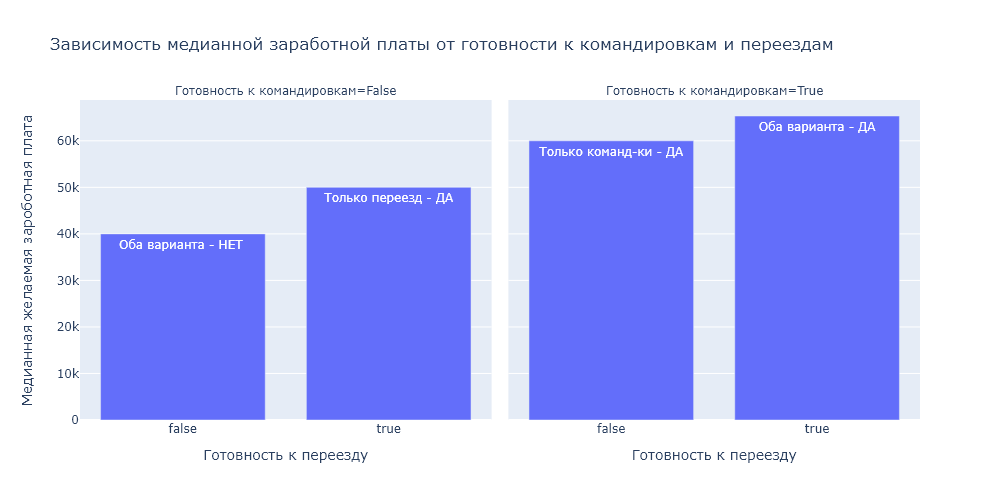

In [44]:
# Группируем города по медиане зароботной платы 
data = hh_df.groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()


# сторим многоуровневую столбчатую диаграмму
fig=px.bar(
    data_frame=data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    facet_col = 'Готовность к командировкам', # добавление дополнительного стобца в подграфик по горизонтали
    title='Зависимость медианной заработной платы от готовности к командировкам и переездам',# имя графика
    text=['Оба варианта - НЕТ ', 'Только команд-ки - ДА',
        'Только переезд - ДА', 'Оба варианта - ДА'], # метки данных
    labels={'ЗП (руб)': 'Медианная желаемая зароботная плата'},# подписи осей
    height=500,
    width=1000,
    orientation='v'
)
fig.update_traces(showlegend=False)

# Записываем диаграмму в HTML и отображаем её
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart7.html')
fig.show("png")

Можно отметить, что наименьшая медианная желаемая зароботная плата наблюдается у соискателей не готовых ни к переездам ни к командировкам, соответственно у соискателей готовых к обоим предложениям желаемая зар.плата выше. Также интересно, что жанный показатель у соискателей готовых только к командировкам выше (на 10 тыс. рублей) чем у тех, кто готов только к переезду.

Ответ на контрольный вопрос: \
"Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам?" (66) у меня не совпал, не смогла видимо подобрать валидный диапазон зароботной платы, минимальный порог пробовала подобрать, однако 66 не получилось. 

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

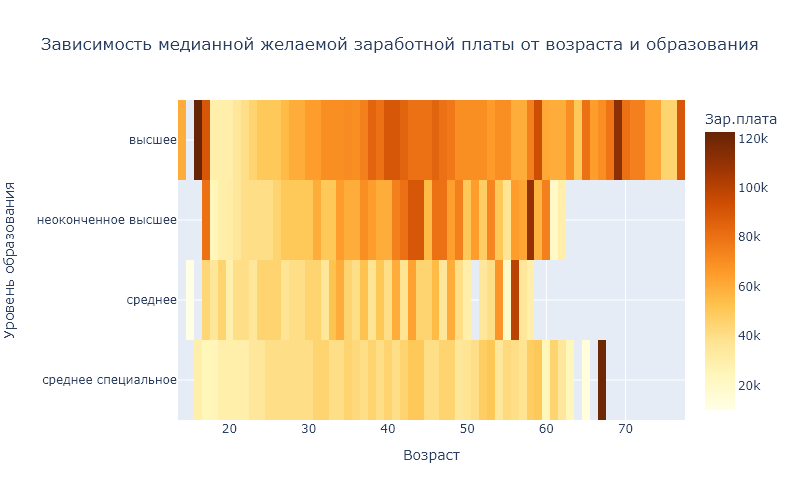

In [45]:
# Отфильтруем таблицу от выбросов
# и сгруппируем таблицу по Возрасту и Образованию медианной зар.платой
mask_1 = (hh_database['ЗП (руб)'] < 1e6) & (hh_database['ЗП (руб)']>=5e3) 
mask_2 = hh_database['Возраст'] < 100
data_PT = hh_database[mask_1 & mask_2].groupby(by=['Образование', 'Возраст'], as_index=False)['ЗП (руб)'].median()


# Строим сводную таблицу 
pivot = pd.pivot_table(
    data_PT,
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)'
);


# Строим тепловую карту
fig = px.imshow(
    pivot,
    title='Зависимость медианной желаемой заработной платы от возраста и образования',# наименование диаграммы
    labels={'x' : 'Возраст' , 'y': 'Уровень образования', 'color': 'Зар.плата'},# наименования осей
    height=500, 
    width=800, 
    color_continuous_scale=px.colors.sequential.YlOrBr # цветовая палитра тепловой карты
)
    
fig.update_layout(title_xanchor='center', title_x=0.5)

# Записываем диаграмму в HTML и отображаем её
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart8.html')
fig.show("png")


1. Тепловая карта отображает, что самый интенсивный рост зароботной платы наблюдается у соискателей высшего образования, также можно увидеть что представители данной категории а также соискатели с уровнем образования неоконченно высшее на заре карьеры (16-17 лет) амбициозны в плане запрашиваемой заработной платы, однако чуть позже они оценивают востребованность своих навыков  более объктивно, и рост запрашиваемой зар.платы преобретает плавный характер.
2. Также можно отметить, что соискателям с уровнем образования высшее и неоконченно высшее свойственно в более зрелых годах  (с высшим образованием от 56 до 70, с неоконченным высшим -от 56 до 60) запрашивать высокую зар.плату относительно вакантов более молодого поколения, это обусловлено тем, что представители данной возрастной категории чётко определяют уровень своей профессиональности,имеют определенный опыт и багаж знаний, к тому же такие соискатели замотивированы в основном зар.платой, то есть меньше заинтересованы в нефинансовой мотивации.
3. Тепловая карта четко показывает, что соискатели с уровнем образования ниже высшего образования старше 60 лет не указывают сумму желаемой зароботной платы, это объясняется тем, что работодатели предпочитают более молодых работников, по разумеющимся причинам: молодые производительнее в физическом плане и оперативнее, что немаловажно среди работников данной категории, от которых не требуются востребованные или дефицитные, современные навыки. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

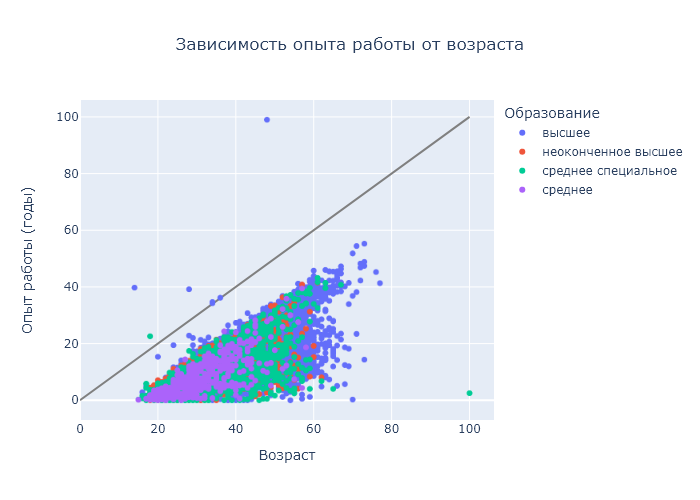

In [46]:
# Переводим опыт работы в года
hh_data_exp['Опыт работы (годы)'] = hh_data_exp['Опыт работы (месяц)'].apply(lambda x: round(x/12, 2))

# Строим диаграмму рассеяния
fig = px.scatter(
    data_frame=hh_data_exp,
    x='Возраст',
    y='Опыт работы (годы)',
    color='Образование',
    title='Зависимость опыта работы от возраста',
    category_orders={'Образование': ['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее']}
)

fig.add_scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    showlegend=False,
    line_color='gray'
);

fig.update_layout(title_xanchor='center', title_x=0.5)

# Записываем диаграмму в HTML и отображаем её
fig.write_html(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\charts\chart9.html')
fig.show("png")


В диаграмме чётко определяются ошибочные данные, в которых стаж соискателя выше возраста - 7 точек, также есть близлежащие около линии точки, где разность между возрастом и стажем составляет 4 -7 лет, тажкже снова выделился 100 летний соискатель с 2,5 летним стажем. При расчетах статистических данных их необходимо исключить.

В разрезе пола соискателя можно увидеть, что женщины чуть раньше (приблизительно после 60) прекращают поиски работы относительно мужчин. А в разрезе уровня образования соискателей, видно как наиболее раньше прекращают поиски работы категория среднее образование, при этом дольше всех (до 70-77 лет) держится на рынке труда люди с высшим образованием.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [47]:
# ваш код здесь
# Не успела

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [48]:
num_dupl = hh_database[hh_database.duplicated()].shape[0]
print(f'Число дубликатов в таблице данных {num_dupl}')

hh_dedupped = hh_database.drop_duplicates()
print(f'Число строк очищенной от дубликатов таблицы {hh_dedupped.shape[0]}')

Число дубликатов в таблице данных 161
Число строк очищенной от дубликатов таблицы 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [49]:
num_nan = hh_dedupped[hh_dedupped['Опыт работы (месяц)'].isna()].shape[0]
print(f'Число пропусков в признаке "Опыт работы (месяц)" {num_nan}')

Число пропусков в признаке "Опыт работы (месяц)" 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [50]:
# Определяем список столбцов, в кооторых нужно удалить строки с пропусками 
# и удаляем эти строки из таблицы.
subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность' ]
hh_dedupped = hh_dedupped.dropna(subset = subset)


# Устанавливаем значения для замены пропусков для признака "Опыт работы (месяц)"
# и заменяем пропуски
values = {'Опыт работы (месяц)' : hh_dedupped['Опыт работы (месяц)'].median()}
hh_dedupped = hh_dedupped.fillna(value = values)

# Контрольный вопрос: Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
mean = hh_dedupped['Опыт работы (месяц)'].mean().round()
print(f'Результирующее среднее значение: {mean}')

Результирующее среднее значение: 114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [51]:
#  Фильтруем признак по заданным условиям, 
# чтобы передать в параметр index в методе drop() индексы удаляемых строк
mask1=(hh_dedupped['ЗП (руб)']<1e3) | (hh_dedupped['ЗП (руб)']>1e6)


# контрольный вопрос: Сколько выбросов вы нашли?
num_outlier = hh_dedupped[mask1]['ЗП (руб)'].count()
print(f'Число найденных выбросов {num_outlier}')


# Удаляем записи
hh_dedupped.drop(index=hh_dedupped[mask1].index, inplace=True)
print(f'Число строк после удаления выбросов по зар.плате: {hh_dedupped.shape[0]}')

Число найденных выбросов 89
Число строк после удаления выбросов по зар.плате: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [52]:
# Создаем признак опыта работы в годах
# и фильтруем таблицу по заданным условиям чтобы определелить индексы удаляемых записей
hh_dedupped['Опыт работы (годы)'] = hh_dedupped['Опыт работы (месяц)'].apply(lambda x: round(x/12, 2))
mask2=hh_dedupped['Опыт работы (годы)'] > hh_dedupped['Возраст']
print(f'Число выбросов по признаку опыт работы в годах {hh_dedupped[mask2].shape[0]}')


# Удалем записи с выбросами
hh_dedupped.drop(index=hh_dedupped[mask2].index, inplace=True)

Число выбросов по признаку опыт работы в годах 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Коэффициент ассеметрии распределения: 0.47


Под категорию выбросов попали соискатели с возрастом: [ 15 100]
Число выбросов : 3


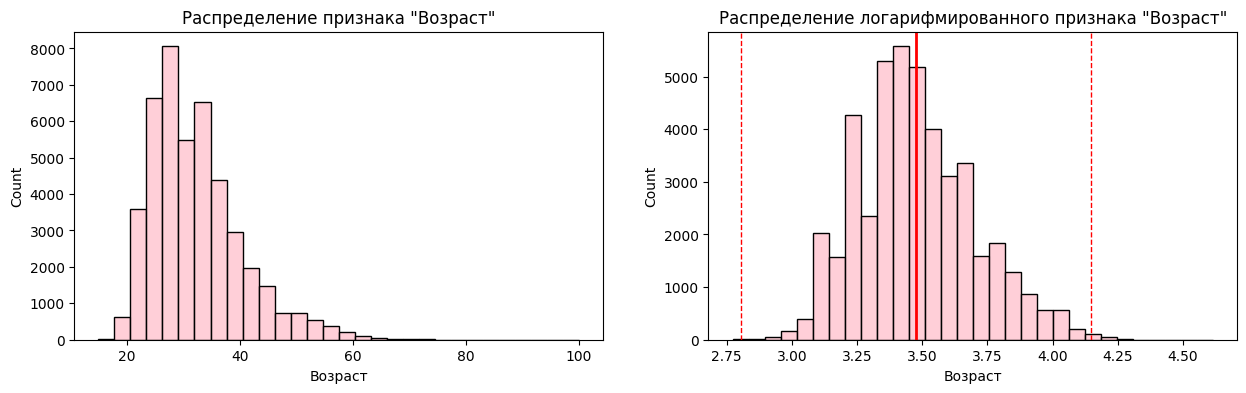

In [53]:
# Так как не смогла отобразить линию среднего и границы интервала метода трех сигм на plotly express, 
# даннве диаграммы строю через seaborn

# Создаём среду для двух диаграмм
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

#строим на первом полотне гистограмму исходного признака
histplot = sns.histplot(hh_dedupped['Возраст'], bins = 30, ax=axes[0], color='pink')
histplot.set_title('Распределение признака "Возраст"');


#во втором гистограмму в логарифмическом масштабе
log_col_age = np.log(hh_dedupped['Возраст']+1)
histplot = sns.histplot(log_col_age, bins = 30, ax=axes[1], color='pink')
histplot.axvline(log_col_age.mean(), color='r', lw=2)
histplot.axvline(log_col_age.mean()+ 3 * log_col_age.std(), color='r', ls='--', lw=1)
histplot.axvline(log_col_age.mean()- 3 * log_col_age.std(), color='r', ls='--', lw=1)
histplot.set_title('Распределение логарифмированного признака "Возраст"');

# вычисляем коэффициент ассеметрии
print(f'Коэффициент ассеметрии распределения: {log_col_age.skew().round(2)}')


# Создаём функцию очищающую таблицу от выбросов по заданному признаку
def get_outliers_cleaned (data, feature, log_scale=False, left=3, right=3):
    """Функция на входд принимает datafarme и признак по которому нужно освободить dataframe от выбросов
        и возвращает отдельно таблицу с выбросами и очищенную таблицу

    Args:
        data (Pandas.DataFrame): таблица, которую нужно очистить
        feature (str): наименоование признака по выбросам которого нужно очистить таблицу 
        log_scale (bool, optional): булево значение, является ли распределение признака логнормальным, по умолчанию False.
        left (int, optional): отложение сигмы (стандартного отклонения) на лево, по умолчанию 3.
        right (int, optional): отложение сигмы (стандартного отклонения) на право, по умолчанию 3.

    Returns:
        outliers (Pandas.DataFrame) : таблица с выбросами по заданному признаку
        cleaned (Pandas.DataFrame) : таблица с очищеннымиданными по заданному признаку 
    """
    if log_scale:
        x=np.log(data[feature]+1) # если распределение признака логнормальное работаем с логарифмированным признаком
    else: x = data[feature] # иначе с исходным признаком
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

# Применим функцию к нашей таблице с послаблением на право на одну сигму, и получим таблицу с выбросами и очищенную таблицу
Outliers, cleaned_df = get_outliers_cleaned(hh_dedupped, 'Возраст', log_scale=True, left=3, right=4)


# Далее выводим уникальные значения по признаку возраст в таблице с выбросами и число выбросов
print(f'Под категорию выбросов попали соискатели с возрастом: {Outliers["Возраст"].unique()}')
print(f'Число выбросов : {Outliers["Возраст"].shape[0]}')

Распределеие признака "Возраст" логнормальное с правосторонней ассеметрией, коэфициент ассеметрии составил 0.45. Под категорию выбросов попали соискатели в возрасте 15, 100 лет. Таких выбросов оказалось всего 3.

In [54]:
# Записываем полученный очищенный файл в локальный репозиторий
cleaned_df.to_csv(r'C:\skill\SkillFactory\PROJECT-1. Анализ резюме из HeadHunter\cleaned_df.csv')